# Working with t-tests

Below are 5 sets of data. Each of them have questions which can be addressed using a t-test. For each dataset:

1. Identify the research question
2. Choose the appropriate t-test
3. Do the t-test in Python (see chapter and/or slides for code)
4. Report your results using the APA format, just like in the examples in the book (e.g. With a mean grade of 72.3, the psychology students scored slightly higher than the average grade of 67.5 (𝑡(19)=2.25, 𝑝<.05))
5. Make a figure which illustrates the results

NB: for some of these data sets, you may have to re-arrange the data a little before you can do your analysis! If the data are in long format, where there is a column with a grouping variable, like the example below, an easy way to get data out so they can be entered in a t-test is to make two new variables, like this:

| ID number | Group  | Measure |
| :-------: | :----: | :-----: |
|     1     | A      |   32    |
|     2     | B      |  43.2   |
|     3     | A      |  31.2   |
|     4     | B      |  22.1   |

Group1 = pd.DataFrame(df.loc[df['GroupingVariable'] == 'A']['Measure'])

Group2 = pd.DataFrame(df.loc[df['GroupingVariable'] == 'B']['Measure'])

Now the t-test can be done with Group1 and Group2.

## Dataset 1: "Moon and Aggression"

Description:

This data set, "Moon & Aggression", provides the number of disruptive behaviors by dementia patients during two different phases of the lunar cycle (Moore et al, 2012, p. 410). Each row corresponds to one participant.

Variables:

Moon - The average number of disruptive behaviors during full moon days.
Other - The average number of disruptive behaviors during other days.

Assignment:
Examine the adequacy of the null hypothesis which states that the average number of disruptive behaviors among patients with dementia does not differ between moon days and other days. Calculate an appropriate test statistic, and make a figure illustrating the comparison. Write a sentence reporting your results in the same way they are reported in the book (APA format): 

> With a mean grade of 72.3, the psychology students scored slightly higher than the average grade of 67.5 (𝑡(19)=2.25, 𝑝<.05)

References:

Moore, D. S., McCabe, G. P., and Craig. B. A. (2012) Introduction to the Practice of Statistics (7th ed). New York: Freeman.

"These data were collected as part of a larger study of dementia patients conducted by Nancy Edwards and Alan Beck, Purdue University." (Moore et al, 2012, p. N-8). 

In [2]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/ethanweed/datasets-for-teaching/main/JASP_data_library/2.%20T-Tests/Moon%20and%20Aggression.csv')
df.head()

,Moon,Other
0,3.33,0.27
1,3.67,0.59
2,2.67,0.32
3,3.33,0.19
4,3.33,1.26


In [3]:
import pingouin as pg

/Users/ethan/opt/miniconda3/lib/python3.9/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package outdated is out of date. Your version is 0.2.1, the latest is 0.2.2.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


In [4]:
pg.ttest(df['Moon'], df['Other'], paired=True)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,6.451789,14,two-sided,0.000015,"[1.62, 3.24]",2.200516,1521.058,1.0


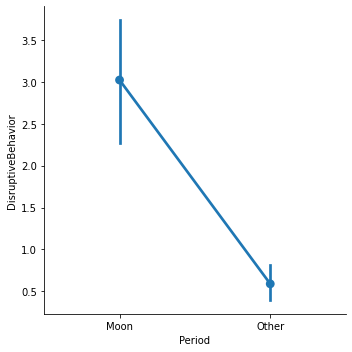

In [5]:
import seaborn as sns

data = pd.melt(df, id_vars=None, var_name='Period', value_name='DisruptiveBehavior')

ax = sns.catplot(x="Period", y = 'DisruptiveBehavior', kind="point", data = data)


In [6]:
df = pd.read_csv('https://raw.githubusercontent.com/ethanweed/datasets-for-teaching/main/sheffield_MASH/crime.csv')
df.head()

,CrimeRate,Youth,Southern,Education,ExpenditureYear0,LabourForce,Males,MoreMales,StateSize,YouthUnemployment,...,ExpenditureYear10,LabourForce10,Males10,MoreMales10,StateSize10,YouthUnemploy10,MatureUnemploy10,HighYouthUnemploy10,Wage10,BelowWage10
0,45.5,135,0,12.4,69,540,965,0,6,80,...,71,564,974,0,6,82,20,1,632,142
1,52.3,140,0,10.9,55,535,1045,1,6,135,...,54,540,1039,1,7,138,39,1,521,210
2,56.6,157,1,11.2,47,512,962,0,22,97,...,44,529,959,0,24,98,33,0,359,256
3,60.3,139,1,11.9,46,480,968,0,19,135,...,41,497,983,0,20,131,50,0,510,235
4,64.2,126,0,12.2,106,599,989,0,40,78,...,97,602,989,0,42,79,24,1,660,162


In [7]:
# Arrange data

Southern = pd.DataFrame(df.loc[df['Southern'] == 1]['CrimeRate'])
Northern = pd.DataFrame(df.loc[df['Southern'] == 0]['CrimeRate'])

In [8]:
# # Independent-sample, Welch's t-test for North vs. South with pingouin

pg.ttest(Northern['CrimeRate'], Southern['CrimeRate'])

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,0.400549,40.428033,two-sided,0.690861,"[-13.04, 19.49]",0.110563,0.322,0.064276


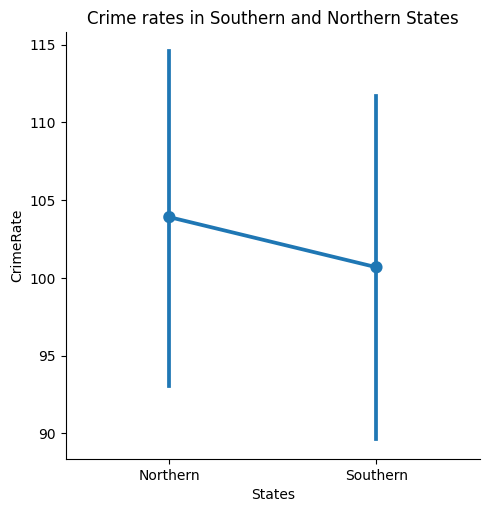

In [9]:
df = pd.read_csv('https://raw.githubusercontent.com/ethanweed/datasets-for-teaching/main/sheffield_MASH/crime.csv')

# Replace 0 and 1 with "Northern" and "Southern" so that the categories are clearer in the graph
df.loc[df['Southern'] == 0, 'States'] = 'Northern' 
df.loc[df['Southern'] == 1, 'States'] = 'Southern' 


ax = sns.catplot(x="States", y = 'CrimeRate', kind="point", data = df)
ax.set(title = 'Crime rates in Southern and Northern States')

## Dataset 5: "Weight Gain"

Description:

This data set, "Weight Gain", provides weights of 16 participants before and after an eight-week period of excessive calorie intake (Moore et al., 2012, p. 425).

Variables:

Weight Before - Weight in pounds (lb) measured before eight weeks of excessive calorie intake.
Weight After - Weight in pounds (lb) measured after eight weeks of excessive calorie intake.
Difference - Weight After - Weight Before.

Assignment:

Test the hypothesis that 1000 excess calorie intake per day over 8 weeks results in 16 pounds (approximately 7.2 kilograms) weight increase. Calculate an appropriate test statistic, and make a figure illustrating the comparison. Write a sentence reporting your results in the same way they are reported in the book (APA format): 

> With a mean grade of 72.3, the psychology students scored slightly higher than the average grade of 67.5 (𝑡(19)=2.25, 𝑝<.05) 

References:

Moore, D. S., McCabe, G. P., and Craig, B. A. (2012). Introduction to the Practice of Statistics (7th ed.). New York: Freeman.

Levine, J. A., Eberhardt, N. L., and Jensen, M. D. (1999) Role of nonexcercise activity thermogenesis in resistance to fat gain in humans. Science, 283:212-214.

In [10]:
df = pd.read_csv("https://raw.githubusercontent.com/ethanweed/datasets-for-teaching/main/JASP_data_library/2.%20T-Tests/Weight%20Gain.csv")

In [11]:
df.head()

,Weight Before,Weight After,Difference
0,122.54,135.74,13.20
1,120.78,129.36,8.58
2,131.12,145.20,14.08
3,137.06,145.64,8.58
4,163.24,173.80,10.56


In [13]:
# One-sample t-test with pingouin

pg.ttest(df['Difference'], 16)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-5.82325,15,two-sided,0.000034,"[8.36, 12.46]",1.455813,750.535,0.999731


[Text(0.5, 1.0, 'Sample weight gain compared to population mean (16 lbs)')]

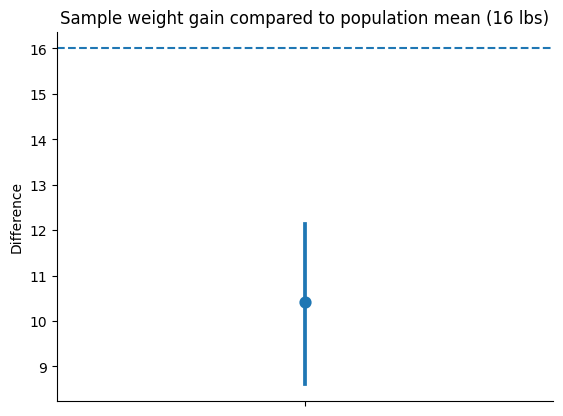

In [14]:
ax = sns.pointplot(y = 'Difference', data = df)
ax.axhline(y = 16, linestyle = '--')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set(title = 'Sample weight gain compared to population mean (16 lbs)')